[2017-08-09 15:26:03.708641] INFO: system_log: rqdatac use socket ('q-rqdatad', 16003)
2016-01-04 INFO 进场，多头开仓
2016-01-06 INFO 出场，多头平仓
2016-01-12 INFO 进场，空头开仓
2016-01-18 INFO 出场，空头平仓
2016-01-22 INFO 进场，多头开仓
2016-02-01 INFO 出场，多头平仓
2016-02-16 INFO 进场，多头开仓
2016-05-05 INFO 出场，多头平仓
2016-05-10 INFO 进场，空头开仓
2016-06-03 INFO 出场，空头平仓
2016-06-15 INFO 进场，空头开仓
2016-06-23 INFO 进场，多头开仓
2016-06-23 INFO 出场，空头平仓
2016-07-08 INFO 出场，多头平仓
2016-07-11 INFO 进场，多头开仓
2016-07-20 INFO 出场，多头平仓
2016-07-22 INFO 进场，多头开仓
2016-08-19 INFO 出场，多头平仓
2016-08-23 INFO 进场，多头开仓
2016-08-29 INFO 出场，多头平仓
2016-08-31 INFO 进场，空头开仓
2016-09-06 INFO 出场，空头平仓
2016-09-09 INFO 进场，空头开仓
2016-09-21 INFO 出场，空头平仓
2016-09-26 INFO 进场，多头开仓
2016-11-17 INFO 出场，多头平仓
2016-11-23 INFO 进场，多头开仓
2016-12-01 INFO 出场，多头平仓
2016-12-05 INFO 进场，空头开仓
2016-12-21 INFO 出场，空头平仓
2016-12-22 INFO 进场，空头开仓
2017-01-09 INFO 出场，空头平仓
2017-01-12 INFO 进场，多头开仓
2017-01-20 INFO 出场，多头平仓
2017-02-06 INFO 进场，空头开仓
2017-02-14 INFO 出场，空头平仓
2017-02-16 INFO 进场，多头开仓
2017-02-24 INFO 出场，多头平仓
2

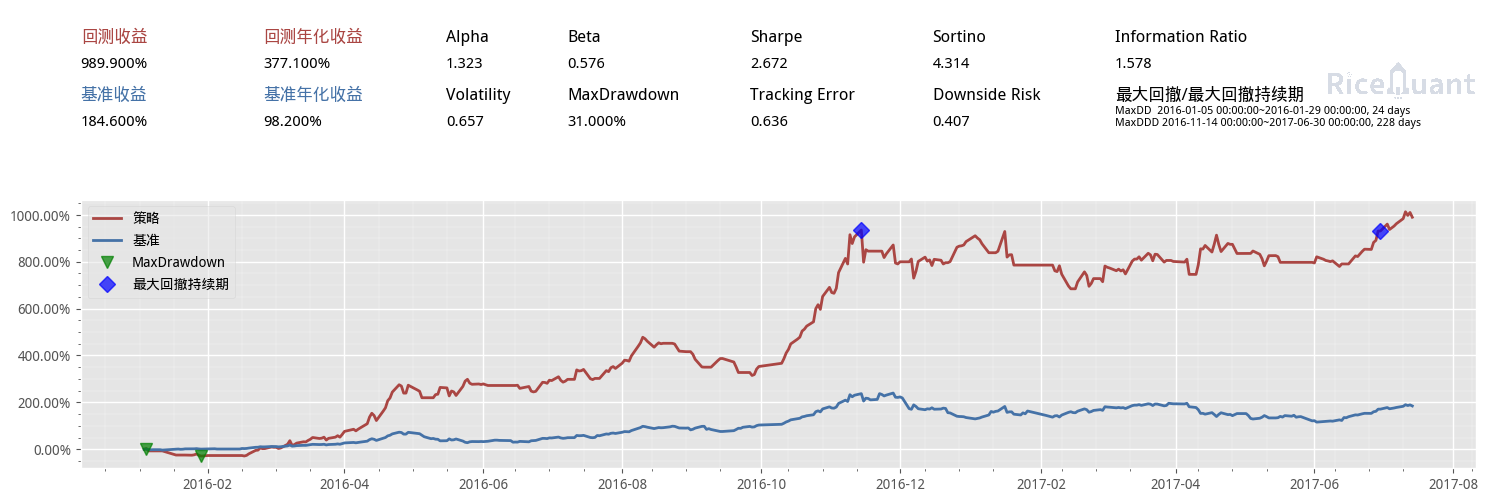

In [11]:
%%rqalpha_plus -s 20160101 -e 20170731 --account future 15000 -fq 1d -p -bm J88
# 上述命令参数可以通过运行 %%rqalpha_plus -h 查看到
 
def init(context):
    # 策略初始化运行
    context.s1 = 'J88'    # 标的为 J88
    context.LEFast = 5    # 多头入场短均线周期参数
    context.LESlow = 20    # 多头入场长均线周期参数
    context.LXFast = 3    # 多头出场短均线周期参数
    context.LXSlow = 10    # 多头出场长均线周期参数
    context.SEFast = 5    # 空头入场短均线周期参数
    context.SESlow = 20    # 空头入场长均线周期参数
    context.SXFast = 3    # 空头出场短均线周期参数
    context.SXSlow = 10    # 空头出场长均线周期参数    

    
def before_trading(context):
    # 每日开盘前运行
    pass
 
def get_data(context, bar_dict):
    # 每个 bar 数据运行
    # 取出数据
    Data = history_bars(context.s1, context.LESlow, 
                        '1d', ['close', 'high', 'low'], 
                        skip_suspended=True, include_now=False)  
    
    CurrrentBar_High = Data[-1]['high']    # 当前 bar 高点
    LastBar_High = Data[-2]['high']    # 上一 bar 高点
    CurrrentBar_Low = Data[-1]['low']    # 当前 bar 低点
    LastBar_Low = Data[-2]['low']    # 上一 bar 低点
    Close = Data['close']
    
    MALEFast = Close[-context.LEFast:].mean()    # 多头入场短均线值
    MALESlow = Close[-context.LESlow:].mean()    # 多头入场长均线值
    MALXFast = Close[-context.LXFast:].mean()    # 多头出场短均线值
    MALXSlow = Close[-context.LXSlow:].mean()    # 多头出场短均线值
    MASEFast = Close[-context.SEFast:].mean()    # 空头入场短均线值
    MASESlow = Close[-context.SESlow:].mean()    # 空头入场长均线值
    MASXFast = Close[-context.SXFast:].mean()    # 空头出场短均线值
    MASXSlow = Close[-context.SXSlow:].mean()    # 空头出场长均线值
    
    return (CurrrentBar_High, LastBar_High, CurrrentBar_Low, 
            LastBar_Low, MALEFast, MALESlow, MALXFast, 
            MALXSlow, MASEFast, MASESlow, MASXFast, MASXSlow)
        
    
def handle_bar(context, bar_dict):
    # 每个 bar 数据运行
    
    BuyQty=context.portfolio.positions[context.s1].buy_quantity    # 多头持仓
    SellQty=context.portfolio.positions[context.s1].sell_quantity    # 空头持仓
    
    CurrrentBar_High, LastBar_High, CurrrentBar_Low, \
    LastBar_Low, MALEFast, MALESlow, MALXFast, \
    MALXSlow, MASEFast, MASESlow, MASXFast, MASXSlow \
    = get_data(context, bar_dict)
 
    if (MALEFast > MALESlow) and (MALXFast > MALXSlow) and (CurrrentBar_High > LastBar_High):
        if BuyQty == 0:
            buy_open(context.s1, 1)
            print('进场，多头开仓')
    if (MALXFast < MALXSlow):
        if BuyQty > 0:    
            sell_close(context.s1, 1)
            print('出场，多头平仓')

    if (MASEFast < MASESlow) and (MASXFast < MASXSlow) and (CurrrentBar_Low < LastBar_Low):
        if SellQty == 0:
            sell_open(context.s1, 1)
            print('进场，空头开仓')
    if (MASXFast > MASXSlow):
        if SellQty > 0:
            buy_close(context.s1, 1)
            print('出场，空头平仓')

def after_trading(context):
    # 每日收盘后运行
    pass